### Tianhui Ma Healthcare Project: 
### Prediction of Cancer Occurrence based on Regression Analysis of DNA, RNA and Protein of c-Myc

In [610]:
#!/usr/bin/env python
# encoding: utf-8
# -*- coding: utf-8 -*
import os
import pandas as pd
import plotly
import plotly.graph_objs as go
import numpy as np
import io
plotly.tools.set_credentials_file(username='tianhuima', api_key='PJNM7WxVRU45oKWlSb4K') # set API key


### Data Extraction & Data Cleanup

In [611]:
############################################## Data extraction
urlrna = "https://raw.githubusercontent.com/TianhuiMa/Gene/master/RNA.txt"
s1=requests.get(urlrna).content
RNA = pd.read_csv(io.StringIO(s1.decode('utf-8')), sep = "\t") # insert RNA data

urldna = "https://raw.githubusercontent.com/TianhuiMa/Gene/master/DNA.txt"
s2=requests.get(urldna).content
DNA = pd.read_csv(io.StringIO(s2.decode('utf-8')),sep = "\t") # insert DNA data

urlPROTEIN = "https://raw.githubusercontent.com/TianhuiMa/Gene/master/PROTEIN(1).txt"
s3=requests.get(urlPROTEIN).content
PROTEIN = pd.read_csv(io.StringIO(s3.decode('utf-8')), sep = "\t") # insert PROTEIN data


############################################## Data Cleanup
##Data Merge
del DNA['MYC_TRUE_CN'] # Delete no need columns
data = RNA.merge(DNA, how = 'outer',on = "Gene") # Data Merge
data = data.merge(PROTEIN, how = 'outer',on = "Gene") # Data Merge
data.columns = ['Gene', 'RNA', 'DNA', 'PROTEIN'] # Rename columns

## Data Clean
data = data.dropna(axis = 0, how = 'any')
data = pd.DataFrame(data)
data.head()

,Gene,RNA,DNA,PROTEIN
0,DMS53_LUNG,5.787634,0.4555,0.114065
1,SW1116_LARGE_INTESTINE,6.467195,0.1829,0.067394
2,NCIH1694_LUNG,0.532113,0.2812,-1.137268
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,8.072169,-0.0255,1.036026
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,6.905030,0.3993,1.320054



###### Research Question 1：Visualize the relationship among DNA, RNA and Protein levels of all tumor cell lines and construct a generalized linear regression model for DNA-Protein, DNA-RNA, and RNA-Protein. This question will provide prediction power for tumor occurrence based on DNA or RNA level. 


### Data Visualization

In [670]:
############################################## Data visualization 

# the relationship between RNA and Protein 
trace1 = go.Scatter(
    x = data["RNA"],
    y = data["PROTEIN"],
    mode='markers',
    marker=dict(
        size=12,
        color = np.random.random(data.iloc[:,0].size), #set color equal to a variable
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
        showscale=False,
        opacity=0.8
    )
) # define draw data
## set x axis name
axis_templatex=dict(
    title='RNA'
)
## set y axis name
axis_templatey=dict(
    title='PROTEIN'
)
layout=go.Layout(
    xaxis=axis_templatex,
    yaxis=axis_templatey
)
plotdata = [trace1]
fig = go.Figure(data=plotdata, layout=layout)
plotly.offline.plot(fig, filename='RNA.html') # plot

'file:///Users/tianhuima/RNA.html'

In [613]:
import statsmodels.api as sm
x = data["RNA"]
x = sm.add_constant(x)
y = data["PROTEIN"]
md2 = sm.OLS(y,x).fit()
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     364.6
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           3.05e-68
Time:                        23:39:37   Log-Likelihood:                -636.87
No. Observations:                 879   AIC:                             1278.
Df Residuals:                     877   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8848      0.050    -17.674      0.000      -0.983      -0.787
RNA            0.1699      0.009     19.095      0.000       0.152       0.187
==============================================================================
Omnibus:                       30.883   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.513
Skew:                           0.446   Prob(JB):                     5.28e-08
Kurtosis:                       3.348   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [671]:
# the relationship between DNA and Protein
trace2 = go.Scatter(
    x = data["DNA"],
    y = data["PROTEIN"],
    mode='markers',
    marker=dict(
        size=12,
        color = np.random.random(data.iloc[:,0].size), #set color equal to a variable
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
        showscale=False,
        opacity=0.8
    )
)# define draw data
## set X axis name
axis_templatex=dict(
    title='DNA'
)
## set y axis name
axis_templatey=dict(
    title='PROTEIN'
)
layout=go.Layout(
    xaxis=axis_templatex,
    yaxis=axis_templatey
)
plotdata = [trace2]
fig = go.Figure(data=plotdata, layout=layout)
plotly.offline.plot(fig, filename='DNA.html') # plot

'file:///Users/tianhuima/DNA.html'

In [615]:
import statsmodels.api as sm
x = data["DNA"]
x = sm.add_constant(x)
y = data["PROTEIN"]
md2 = sm.OLS(y,x).fit()
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     76.78
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           9.74e-18
Time:                        23:39:40   Log-Likelihood:                -752.79
No. Observations:                 879   AIC:                             1510.
Df Residuals:                     877   BIC:                             1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1115      0.024     -4.632      0.000      -0.159      -0.064
DNA            0.2641      0.030      8.763      0.000       0.205       0.323
==============================================================================
Omnibus:                        6.451   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.428
Skew:                           0.209   Prob(JB):                       0.0402
Kurtosis:                       3.024   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [616]:
#the relationship between DNA and RNA
trace2 = go.Scatter(
    x = data["DNA"],
    y = data["RNA"],
    mode='markers',
    marker=dict(
        size=12,
        color = np.random.random(data.iloc[:,0].size), #set color equal to a variable
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
        showscale=False,
        opacity=0.8
    )
)# define draw data
## set x axis name
axis_templatex=dict(
    title='DNA'
)
## set y axis name
axis_templatey=dict(
    title='RNA'
)
layout=go.Layout(
    xaxis=axis_templatex,
    yaxis=axis_templatey
)
plotdata = [trace2]
fig = go.Figure(data=plotdata, layout=layout)
plotly.offline.plot(fig, filename='DNA_AND_RNA.html') # plot

'file:///Users/tianhuima/DNA_AND_RNA.html'

In [617]:
import statsmodels.api as sm
x = data["DNA"]
x = sm.add_constant(x)
y = data["RNA"]
md2 = sm.OLS(y,x).fit()
md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RNA   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     125.8
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           2.20e-27
Time:                        23:39:44   Log-Likelihood:                -1750.3
No. Observations:                 879   AIC:                             3505.
Df Residuals:                     877   BIC:                             3514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7924      0.075     64.004      0.000       4.645       4.939
DNA            1.0519      0.094     11.218      0.000       0.868       1.236
==============================================================================
Omnibus:                      261.785   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                          -1.439   Prob(JB):                    5.98e-184
Kurtosis:                       6.841   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


###### Research Question 2: Visualize the relationship among DNA, RNA and Protein levels of cell lines of specific tumor type( for example: Lung cancer, STOMACH cancer and SKIN cancer) and construct a generalized linear regression model for DNA-Protein, DNA-RNA, and RNA-Protein. This question will provide prediction power for occurrence of specific tumor type based on DNA or RNA level. 

## LUNG Cancer

In [618]:
#import statsmodels.api as sm
import statsmodels.formula.api as sm

In [619]:
data["Gene"] = data["Gene"].astype(str)
y=data[data["Gene"].str.contains("LUNG")]
y

,Gene,RNA,DNA,PROTEIN
0,DMS53_LUNG,5.787634,0.4555,0.114065
2,NCIH1694_LUNG,0.532113,0.2812,-1.137268
10,NCIH1184_LUNG,0.342109,-0.3427,-0.127913
13,NCIH2227_LUNG,-1.681285,-0.2863,-0.686956
29,RERFLCAD2_LUNG,5.538319,0.3963,-0.112106
34,NCIH2347_LUNG,5.479658,0.6188,-0.267261
41,NCIH2087_LUNG,6.932414,1.6433,0.907519
43,NCIH2085_LUNG,5.274371,-0.1127,-0.438074
47,NCIH2066_LUNG,5.633139,0.4493,0.141166
48,NCIH1341_LUNG,7.547795,1.3065,0.240771


In [620]:
df = y
df.head()

,Gene,RNA,DNA,PROTEIN
0,DMS53_LUNG,5.787634,0.4555,0.114065
2,NCIH1694_LUNG,0.532113,0.2812,-1.137268
10,NCIH1184_LUNG,0.342109,-0.3427,-0.127913
13,NCIH2227_LUNG,-1.681285,-0.2863,-0.686956
29,RERFLCAD2_LUNG,5.538319,0.3963,-0.112106


In [621]:
df.corr()

,RNA,DNA,PROTEIN
RNA,1.000000,0.511292,0.663106
DNA,0.511292,1.000000,0.525217
PROTEIN,0.663106,0.525217,1.000000


In [622]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [623]:
lr = LinearRegression()
X = df[['DNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.34648987256778996, array([0.420484]))

In [624]:
# get y-hat
yhat = lr.predict(X = df[['DNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.33434871693778706

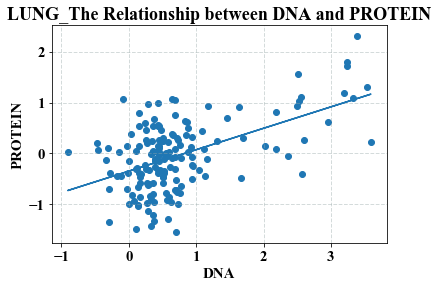

In [625]:
# lm plot
plt.scatter(df['DNA'],df['PROTEIN'])
plt.plot(df['DNA'],yhat)
#set the name of X axis
plt.xlabel('DNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('LUNG_The Relationship between DNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [626]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     23.58
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           2.82e-06
Time:                        23:39:49   Log-Likelihood:                -156.57
No. Observations:                 162   AIC:                             315.1
Df Residuals:                     161   BIC:                             318.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DNA            0.2193      0.045      4.856      0.000       0.130       0.309
==============================================================================
Omnibus:                        0.281   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.439
Skew:                           0.053   Prob(JB):                        0.803
Kurtosis:                       2.768   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [627]:
lr = LinearRegression()
X = df[['RNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.9216440457523634, array([0.18596929]))

In [628]:
# get y-hat
yhat = lr.predict(X = df[['RNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.25869388485369893

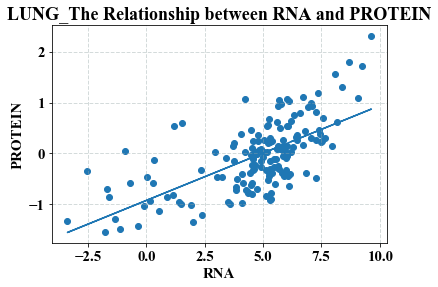

In [629]:
# lm plot
plt.scatter(df['RNA'],df['PROTEIN'])
plt.plot(df['RNA'],yhat)
#set the name of X axis
plt.xlabel('RNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('LUNG_The Relationship between RNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [630]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.09
Date:                Wed, 27 Jun 2018   Prob (F-statistic):            0.00179
Time:                        23:39:49   Log-Likelihood:                -162.72
No. Observations:                 162   AIC:                             327.4
Df Residuals:                     161   BIC:                             330.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNA            0.0312      0.010      3.176      0.002       0.012       0.051
==============================================================================
Omnibus:                        6.730   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.357
Skew:                           0.455   Prob(JB):                       0.0417
Kurtosis:                       3.338   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [631]:
lr = LinearRegression()
X = df[['RNA']]
y = df['DNA']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.12847178746678878, array([0.17910858]))

In [632]:
# get y-hat
yhat = lr.predict(X = df[['RNA']])
# MSE
mean_squared_error(df['DNA'],yhat)

0.5320452957326156

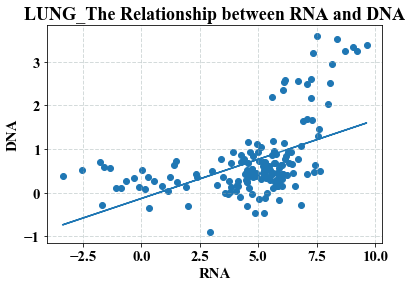

In [633]:
# lm plot
plt.scatter(df['RNA'],df['DNA'])
plt.plot(df['RNA'],yhat)
#set the name of X axis
plt.xlabel('RNA')
#set the name of y axis
plt.ylabel('DNA')
#set the title of the plot
plt.title('LUNG_The Relationship between RNA and DNA')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [634]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DNA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           6.33e-31
Time:                        23:39:50   Log-Likelihood:                -179.28
No. Observations:                 162   AIC:                             360.6
Df Residuals:                     161   BIC:                             363.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNA            0.1575      0.011     14.467      0.000       0.136       0.179
==============================================================================
Omnibus:                       35.360   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.540
Skew:                           1.206   Prob(JB):                     6.43e-12
Kurtosis:                       4.349   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### STOMACH Cancer

In [635]:
data["Gene"] = data["Gene"].astype(str)
x=data[data["Gene"].str.contains("STOMACH")]
x

,Gene,RNA,DNA,PROTEIN
39,RERFGC1B_STOMACH,4.163422,0.2182,-0.466282
52,HS746T_STOMACH,5.466250,0.6573,-0.140819
116,LMSU_STOMACH,5.772277,1.4295,0.381425
131,ECC10_STOMACH,6.835379,0.7480,0.942912
147,TGBC11TKB_STOMACH,6.351509,0.0065,0.347877
155,SNU520_STOMACH,6.069303,0.4150,0.412011
162,GSS_STOMACH,6.540482,0.1945,0.993752
167,SNU620_STOMACH,6.152818,0.6756,0.026765
168,ECC12_STOMACH,5.673451,0.8568,-0.000147
169,GSU_STOMACH,6.726958,0.1696,0.316572


In [636]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [637]:
df = x
df.head()

,Gene,RNA,DNA,PROTEIN
39,RERFGC1B_STOMACH,4.163422,0.2182,-0.466282
52,HS746T_STOMACH,5.466250,0.6573,-0.140819
116,LMSU_STOMACH,5.772277,1.4295,0.381425
131,ECC10_STOMACH,6.835379,0.7480,0.942912
147,TGBC11TKB_STOMACH,6.351509,0.0065,0.347877


In [638]:
df.corr()

,RNA,DNA,PROTEIN
RNA,1.000000,0.39706,0.322885
DNA,0.397060,1.00000,0.277110
PROTEIN,0.322885,0.27711,1.000000


In [639]:
lr = LinearRegression()
X = df[['DNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.004085373691450234, array([0.20489782]))

In [640]:
# get y-hat
yhat = lr.predict(X = df[['DNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.3179143428839849

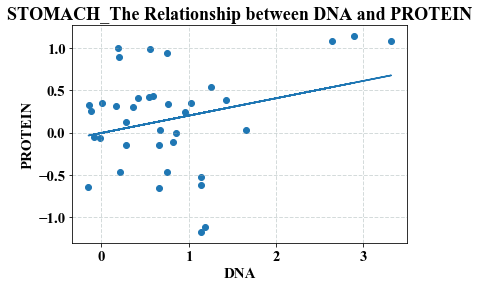

In [641]:
# lm plot
plt.scatter(df['DNA'],df['PROTEIN'])
plt.plot(df['DNA'],yhat)
#set the name of X axis
plt.xlabel('DNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('STOMACH_The Relationship between DNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [642]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.778
Date:                Wed, 27 Jun 2018   Prob (F-statistic):             0.0215
Time:                        23:39:52   Log-Likelihood:                -31.301
No. Observations:                  37   AIC:                             64.60
Df Residuals:                      36   BIC:                             66.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DNA            0.2023      0.084      2.404      0.022       0.032       0.373
==============================================================================
Omnibus:                        2.984   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.271
Skew:                          -0.606   Prob(JB):                        0.321
Kurtosis:                       3.041   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [643]:
lr = LinearRegression()
X = df[['RNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.9943413413853258, array([0.19893007]))

In [644]:
# get y-hat
yhat = lr.predict(X = df[['RNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.3084567171304645

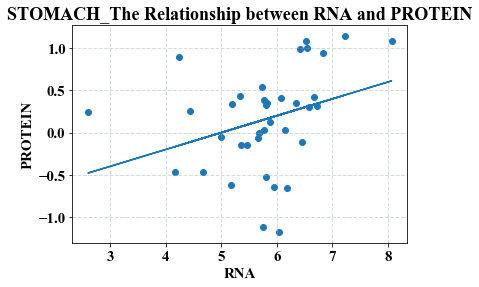

In [645]:
# lm plot
plt.scatter(df['RNA'],df['PROTEIN'])
plt.plot(df['RNA'],yhat)
#set the name of X axis
plt.xlabel('RNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('STOMACH_The Relationship between RNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [646]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     3.703
Date:                Wed, 27 Jun 2018   Prob (F-statistic):             0.0622
Time:                        23:39:53   Log-Likelihood:                -32.243
No. Observations:                  37   AIC:                             66.49
Df Residuals:                      36   BIC:                             68.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNA            0.0316      0.016      1.924      0.062      -0.002       0.065
==============================================================================
Omnibus:                        0.909   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.885
Skew:                          -0.339   Prob(JB):                        0.642
Kurtosis:                       2.662   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [647]:
lr = LinearRegression()
X = df[['RNA']]
y = df['DNA']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-1.12922346966531, array([0.33084503]))

In [648]:
# get y-hat
yhat = lr.predict(X = df[['RNA']])
# MSE
mean_squared_error(df['DNA'],yhat)

0.5305541859917932

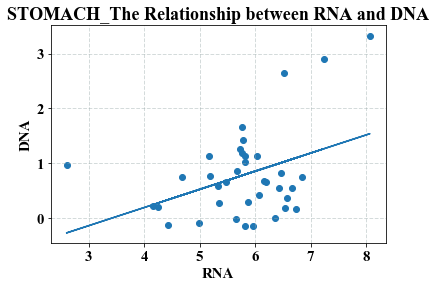

In [649]:
# lm plot
plt.scatter(df['RNA'],df['DNA'])
plt.plot(df['RNA'],yhat)
#set the name of X axis
plt.xlabel('RNA')
#set the name of y axis
plt.ylabel('DNA')
#set the title of the plot
plt.title('STOMACH_The Relationship between RNA and DNA')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [650]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DNA   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     43.54
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           1.11e-07
Time:                        23:39:53   Log-Likelihood:                -41.912
No. Observations:                  37   AIC:                             85.82
Df Residuals:                      36   BIC:                             87.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNA            0.1409      0.021      6.599      0.000       0.098       0.184
==============================================================================
Omnibus:                       12.849   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.807
Skew:                           1.261   Prob(JB):                      0.00166
Kurtosis:                       4.395   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### SKIN Cancer

In [651]:
data["Gene"] = data["Gene"].astype(str)
p=data[data["Gene"].str.contains("SKIN")]
p

,Gene,RNA,DNA,PROTEIN
9,RVH421_SKIN,6.213419,0.3495,-0.275106
22,HS895T_SKIN,3.644536,0.0040,-0.923141
36,HS940T_SKIN,3.653476,0.2111,-0.601584
59,SKMEL1_SKIN,5.465042,0.2107,-0.643500
82,HS936T_SKIN,4.916971,-0.0069,-0.163685
95,SKMEL28_SKIN,5.476062,0.0449,-0.476686
99,SH4_SKIN,5.583495,0.6915,0.109079
122,CJM_SKIN,6.654520,0.5774,0.134809
181,WM115_SKIN,3.280969,0.0414,0.379686
193,COLO800_SKIN,4.118405,-0.3022,-0.299500


In [652]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [653]:
df = p
df.head()

,Gene,RNA,DNA,PROTEIN
9,RVH421_SKIN,6.213419,0.3495,-0.275106
22,HS895T_SKIN,3.644536,0.0040,-0.923141
36,HS940T_SKIN,3.653476,0.2111,-0.601584
59,SKMEL1_SKIN,5.465042,0.2107,-0.643500
82,HS936T_SKIN,4.916971,-0.0069,-0.163685


In [654]:
df.corr()

,RNA,DNA,PROTEIN
RNA,1.000000,0.252607,0.440594
DNA,0.252607,1.000000,-0.092364
PROTEIN,0.440594,-0.092364,1.000000


In [655]:
lr = LinearRegression()
X = df[['DNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.11936505045208781, array([-0.15282097]))

In [656]:
# get y-hat
yhat = lr.predict(X = df[['DNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.18316962781811336

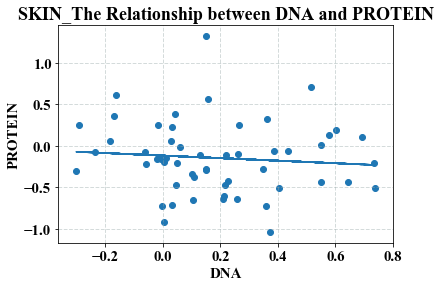

In [657]:
# lm plot
plt.scatter(df['DNA'],df['PROTEIN'])
plt.plot(df['DNA'],yhat)
#set the name of X axis
plt.xlabel('DNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('SKIN_The Relationship between DNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [658]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.825
Date:                Wed, 27 Jun 2018   Prob (F-statistic):             0.0558
Time:                        23:39:55   Log-Likelihood:                -32.154
No. Observations:                  54   AIC:                             66.31
Df Residuals:                      53   BIC:                             68.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DNA           -0.3698      0.189     -1.956      0.056      -0.749       0.009
==============================================================================
Omnibus:                        7.510   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.886
Skew:                           0.667   Prob(JB):                       0.0320
Kurtosis:                       4.131   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [659]:
lr = LinearRegression()
X = df[['RNA']]
y = df['PROTEIN']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(-0.8481453231300387, array([0.15485802]))

In [660]:
# get y-hat
yhat = lr.predict(X = df[['RNA']])
# MSE
mean_squared_error(df['PROTEIN'],yhat)

0.14888223324909994

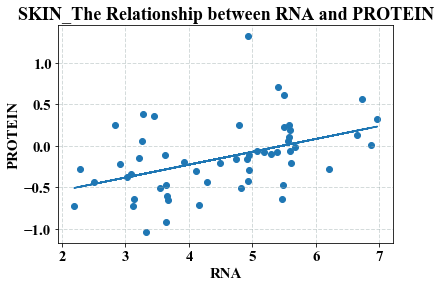

In [661]:
# lm plot
plt.scatter(df['RNA'],df['PROTEIN'])
plt.plot(df['RNA'],yhat)
#set the name of X axis
plt.xlabel('RNA')
#set the name of y axis
plt.ylabel('PROTEIN')
#set the title of the plot
plt.title('SKIN_The Relationship between RNA and PROTEIN')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [662]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PROTEIN   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.320
Date:                Wed, 27 Jun 2018   Prob (F-statistic):              0.134
Time:                        23:39:56   Log-Likelihood:                -32.879
No. Observations:                  54   AIC:                             67.76
Df Residuals:                      53   BIC:                             69.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RNA           -0.0199      0.013     -1.523      0.134      -0.046       0.006
==============================================================================
Omnibus:                        6.376   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.499
Skew:                           0.607   Prob(JB):                       0.0639
Kurtosis:                       3.986   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [663]:
lr = LinearRegression()
X = df[['DNA']]
y = df['RNA']
lr.fit(X,y)
# print the result
lr.intercept_,lr.coef_

(4.304065195603789, array([1.18914036]))

In [664]:
# get y-hat
yhat = lr.predict(X = df[['DNA']])
# MSE
mean_squared_error(df['RNA'],yhat)

1.4000665121343696

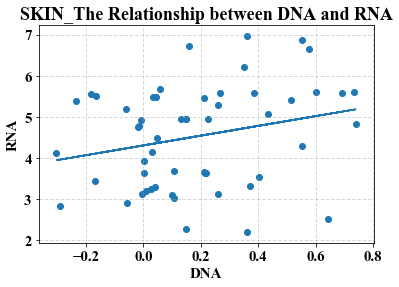

In [665]:
# lm plot
plt.scatter(df['DNA'],df['RNA'])
plt.plot(df['DNA'],yhat)
#set the name of X axis
plt.xlabel('DNA')
#set the name of y axis
plt.ylabel('RNA')
#set the title of the plot
plt.title('SKIN_The Relationship between DNA and RNA')
#set the grid color, linestyle and linewidth for the plot
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='both',alpha=0.4)

In [666]:
linear_model = sm.OLS(y,X)

results = linear_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RNA   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     31.94
Date:                Wed, 27 Jun 2018   Prob (F-statistic):           6.44e-07
Time:                        23:39:56   Log-Likelihood:                -147.30
No. Observations:                  54   AIC:                             296.6
Df Residuals:                      53   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DNA            9.0146      1.595      5.652      0.000       5.815      12.214
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.801
Skew:                          -0.282   Prob(JB):                        0.670
Kurtosis:                       2.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""





###                                                                            Conclusion

######### Describe the dataset： The dataset that I selected is “03-08-18-Data Summary for c-Myc Gene”. It is consisted of 3 tables and each table contains 1458 observations. In order to achieve “Data Merge” easily, I transfer the format to txt. The dataset is used to analyze the correlation of either c-Myc DNA (aka. Copy number, CN#) or c-Myc RNA with c-Myc Protein in different cell lines (such as A549 as one of lung cancer cell lines, HCT116 as one of colon cancer cell lines) of different tumor types (such as breast, colorectal, lung and prostate cancer). 

As an oncogene that can transform a cell into a tumor cell in certain circumstances, c-Myc has attracted enough attention from both researchers and drug hunters. If we can well predict c-Myc protein level in the patient’s cells, that will provide a great tool to evaluate the probability of tumor occurrence and alert the victim in time, which might help prevent or kill the tumor at the early stage, saving a lot of lives. c-Myc is an oncogene that is often overexpressed (Protein level) in tumor cells, so it can be used a dignostic biomarker for tumor occurrence. With the advancement of DNA and RNA sequencing technologies in the past decade, DNA and RNA levels now can be measured much more accurately and easier than Protein level. The reason for this is that the detection approaches for Protein (typically Immunohistochemistry or Mass Spectrometry) is still not that advanced and sensitive as those for DNA and RNA. Given this, in the clinical setting, if DNA or RNA level can well predict Protein level of c-Myc, it could solve this technical barrier for Protein detection and provide better prediction for tumor occurrence in individuals. 

######### Question #1: Overall, at the first glance, there is a better correlation between RNA and protein among all cell lines regardless of tumor types, suggesting that RNA level might provide stronger prediction power for c-Myc protein level. This is confirmed by linear regression analysis using LinearRegression( ) code, with much better adjusted R^2 for RNA-Protein analysis (0.293) than that for DNA-Protein analysis (0.079). 
DNA-Protein Linear Regression Model for all cell lines: Adjusted R^2=0.079
RNA-Protein Linear Regression Model in Lung: Adjusted R^2=0.293

######### Question #2: As discussed above, it is great to see a nice correlation between RNA and Protein of c-Myc in all cell lines for all tumor types. However, in the actual clinical setting, it is always important to find out whether c-Myc protein is a good biomarker for a specific tumor type, rather than all tumor types. Given this fact, I re-did the scattered plots and linear regression analysis for three different tumor types, Lung, Stomach and Skin, and determine DNA-Protein and RNA-Protein relationships for each. 
Overall, out of all 3 tumor types, there is a better DNA-Protein correlation than RNA-Protein correlation, suggesting that DNA level might provide stronger prediction power for c-Myc protein level. This is a different observation from the above for all cell lines of all tumor types.  In addition, DNA-Protein correlation seems to be the strongest among all 3 tumor types, although adjusted R^2 (0.122) is not that satisfactory.  
DNA-Protein Linear Regression Model in Lung: Y=0.4205X-0.3465 (Adjusted R^2=0.122) 
RNA-Protein Linear Regression Model in Lung: Y=0.1860X-0.9216 (Adjusted R^2=0.053) 
DNA-Protein Linear Regression Model in Stomach: Y=0.2049X-0.0041 (Adjusted R^2=0.114) 
RNA-Protein Linear Regression Model in Stomach: Y=0.1989X-0.9943 (Adjusted R^2=0.068) 
DNA-Protein Linear Regression Model in Skin: Y=-0.1528X-0.1194 (Adjusted R^2=0.050) 
RNA-Protein Linear Regression Model in Stomach: Y=0.1548X-0.8481 (Adjusted R^2=0.024)

In addition, DNA-RNA correlation analysis has also been performed here in parallel, and it is obvious that DNA-RNA correlation is much better than either DNA-Protein or RNA-Protein correlation. This is quite reasonable given the fact that translational and post-translational regulation (RNA to Protein) are a lot more complicated than transcriptional and post-transcriptional regulation (DNA to RNA). 

In summary, for all tumor types, c-Myc RNA level provides the best prediction power for c-Myc protein level, which will could act a strong diagnostic biomarker for tumor occurrence. On the contrary, out of 3 selected tumor types, as compared to c-Myc RNA level, c-Myc DNA level provides slightly better prediction power for c-Myc protein level, which is the most prominent in Lung. This means, based on what question we are trying to answer, we should be careful about selecting either c-Myc RNA (tumor occurrence) or DNA (occurrence of a specific tumor type) for c-Myc protein level prediction.  

